# Input and output

Wavespectra currently supports* reading from and writing to the following file formats:

* WW3 Netcdf
* SWAN Netcdf
* SWAN ASCII
* WWM
* Funwave
* ERA5
* TriaXYS
* NDBC
* Spotter
* Octopus
* Orcaflex

\* *some of this formats are supported only for either reading or writing*

In [1]:
from pathlib import Path
import matplotlib.pyplot as plt

from wavespectra import read_ww3, read_swan, read_ncswan, read_triaxys

datadir = Path("../data")

## Input

In [3]:
# SWAN ASCII

dset = read_swan(datadir / "swanfile.spec")
dset

<xarray.Dataset>
Dimensions:  (time: 5, lat: 1, lon: 1, freq: 24, dir: 36)
Coordinates:
  * time     (time) datetime64[ns] 2016-10-11 2016-10-12 ... 2016-10-15
  * lat      (lat) float64 -38.17
  * lon      (lon) float64 174.7
  * freq     (freq) float64 0.04 0.0452 0.0511 0.0577 ... 0.5219 0.5899 0.6666
  * dir      (dir) float64 5.0 15.0 25.0 35.0 45.0 ... 325.0 335.0 345.0 355.0
Data variables:
    efth     (time, lat, lon, freq, dir) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    wspd     (time, lat, lon) float64 5.311 8.754 4.203 8.084 12.98
    wdir     (time, lat, lon) float64 9.021 348.2 267.1 291.4 227.2
    dpt      (time, lat, lon) float64 24.42 24.42 24.42 24.42 24.42

In [4]:
# TriaXYS

dset = read_triaxys(datadir / "triaxys.DIRSPEC")
dset

<xarray.Dataset>
Dimensions:  (time: 1, freq: 63, dir: 121)
Coordinates:
  * time     (time) datetime64[ns] 2018-01-31T21:00:00
  * freq     (freq) float64 0.0 0.01 0.02 0.03 0.04 ... 0.58 0.59 0.6 0.61 0.62
  * dir      (dir) float64 0.0 3.0 6.0 9.0 12.0 ... 351.0 354.0 357.0 360.0
Data variables:
    efth     (time, freq, dir) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0

In [5]:
# WW3 Netcdf

dset = read_ww3(datadir / "ww3file.nc")
dset

<xarray.Dataset>
Dimensions:  (dir: 24, time: 9, site: 2, freq: 25)
Coordinates:
  * dir      (dir) float32 270.0 255.0 240.0 225.0 ... 330.0 315.0 300.0 285.0
  * freq     (freq) float32 0.04118 0.0453 0.04983 ... 0.3352 0.3687 0.4056
  * site     (site) int32 1 2
  * time     (time) datetime64[ns] 2014-12-01 2014-12-01T12:00:00 ... 2014-12-05
Data variables:
    dpt      (time, site) float32 dask.array<chunksize=(9, 2), meta=np.ndarray>
    efth     (time, site, freq, dir) float32 dask.array<chunksize=(9, 2, 25, 24), meta=np.ndarray>
    lat      (site) float32 dask.array<chunksize=(2,), meta=np.ndarray>
    lon      (site) float32 dask.array<chunksize=(2,), meta=np.ndarray>
    wspd     (time, site) float32 dask.array<chunksize=(9, 2), meta=np.ndarray>
    wdir     (time, site) float32 dask.array<chunksize=(9, 2), meta=np.ndarray>

## Output

In [6]:
dset.spec.to_swan("ww3_as_swanascii.spec")

In [7]:
dset.isel(site=0).spec.to_funwave("ww3_as_funwave.txt")

INFO:wavespectra.output.funwave:Multiple spectra, writing txt files in zip archive ww3_as_funwave.zip


Text(0.5, 1.0, 'Written')

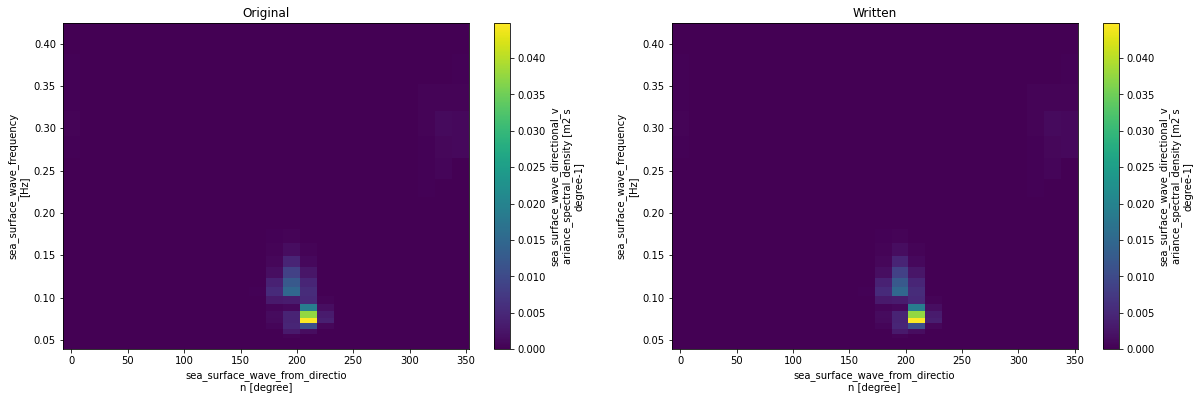

In [8]:
# compare original and written files

dset_original = read_ww3(datadir / "ww3file.nc").sortby("dir")
dset_new = read_swan("ww3_as_swanascii.spec").sortby("dir")

fig = plt.figure(figsize=(20, 6))

ax = fig.add_subplot(121)
darr = dset_original.efth.sortby("dir")
darr.isel(time=0, site=0).plot()
plt.title("Original")

ax = fig.add_subplot(122)
darr = dset_new.efth.sortby("dir")
darr.isel(time=0, site=0).plot()
plt.title("Written")